# <a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>K-Nearest Neighbors (K-En Yakın Komşu </center></h1>

Bu Notebookta bir müşteri veri seti yükleyeceğiz, ve bir veri noktasını tahmin etmek için K-En Yakın Komşu Algoritmasını kullanacağız. 

**KNN** denetimli öğrenme için bir algoritmadır. Bir noktanın sınıfı tahmin edildiğinde, sınıflandırmasını belirlemek için kendisine en yakın olan 'K' puanını dikkate alır.

### KNN algoritmasının görselleştirilmesi.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

<div id="visualization_analysis">
    <h2>Veri Görselleştirme ve Veri Analizi </h2> 
</div>


Bu durumda, A ve B Sınıfı veri noktalarımız var. Yıldızın (test veri noktası) ne olduğunu tahmin etmek istiyoruz.
K değerini 3 olarak kabul edersek (en yakın veri noktası 3) B Sınıfı için bir tahmin elde ederiz.
Ancak, k = 6 değerini düşünürsek, A Sınıfı için bir tahmin elde ederiz.

<h1>İçindekiler</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Veriseti</a></li>
        <li><a href="#visualization_analysis">Veri Görselleştirme ve Veri Analizi </a></li>
        <li><a href="#classification">Sınıflandırma</a></li>
    </ol>
</div>
<br>
<hr>

Önce kütüphaneleri yükleyelim

In [4]:
#import itertools #iterators for efficient looping
import matplotlib.pyplot as plt
#from matplotlib.ticker import NullFormatter #no labels on the ticks
import pandas as pd
import numpy as np
#import matplotlib.ticker as ticker
from sklearn import preprocessing


<div id="about_dataset">
    <h2>Veriseti Hakkında</h2>
</div>

Bir telekomünikasyon firması, müşteri veritabanını, hizmet kullanım modellerine göre bölümlere ayırmakta ve müşterileri dört gruba ayırdığını düşünelim. Demografik veriler, müşteri grup üyeliğini tahmin etmek için kullanılabilirse, şirket potansiyel müşteriler için teklifleri özelleştirebilir. Bu bir sınıflandırma problemidir. Yani, veri setine, önceden tanımlanmış etiketlere sahip olarak, yeni veya bilinmeyen bir örneğin/müşterinin sınıfını tahmin etmek için kullanılacak bir model oluşturmamız gerekir.


Bu örnek, bölge, yaş ve medeni hal gibi demografik veriye odaklanarak kullanım örüntülerini tahmin etmektedir. 

Hedef değişken, __custcat__, olarak isimlendirilmiştir ve 4 farklı müşteri grubuna karşılık gelen değerler almaktadır:
  1- Basic Service (Basit Servis)
  2- E-Service (E-Servis)
  3- Plus Service (Artı Servis)
  4- Total Service (Tüm Servis)

Amacımız bir sınıflandırıcı oluşturarak, yeni müşterilerin sınıfını tahmin etmek olacak. 

### Veriyi CSV dosyasından okuyalım 

In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

#### Her bir sınıftan elimizde kaç tane veri olduğuna bakalım

In [8]:
df['custcat'].value_counts() #Return a Series containing counts of unique values.



3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, ve 217 E-Service Müşterisi


Veriyi görselleştirme teknikleri ile de Özetleyebiiliriz:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f207a1f7358>]],
      dtype=object)

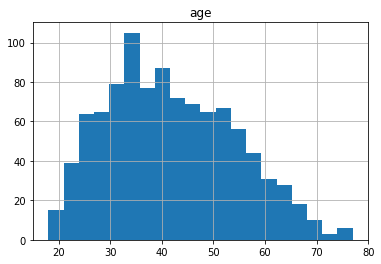

In [11]:
df.hist(column='age', bins=20)

### Feature set (Öznitelik Seti)

Öznitelik kümesini tanımlayalaım, X:

In [12]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Scikit-learn library kullanmak için, Pandas data frame'i Numpy array (dizisine çevirmeliyiz):

In [13]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:10]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

Etiketlerimiz Neler?

In [14]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

## Veriyi Normalize Edelim

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #Z-skor normalizasyonu
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Veriyi Eğitim ve Test Kümesi olarak Ayıralım  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>Sınıflandırma</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

#### Kütüphaneyi dahil edelim (import)

K-En Yakın Komşunun oyunu kullanan sınıflandırıcı 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

### Eğitim

k=1 ile başlayalım: 

In [18]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Tahmin
Bu modeli kullanarak tahminleri yapacağız:

In [19]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 3, 3, 4, 4])

### Doğruluk Değerlendirmesi 
Çok sınıflı Sınıflandırmada, __accuracy classification score__ her sınıfın doğruluğu hesaplanır. Test kümesinde tahmin edilen sınıflarla gerçek sınıfların ne kadarörtüştüğü hesaplanır.  


In [20]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

print("Train set Confusion Matrice:\n", metrics.confusion_matrix(y_train, neigh.predict(X_train)))
print("Test set Confusion Matrice:\n", metrics.confusion_matrix(y_test, yhat))


Train set Accuracy:  1.0
Test set Accuracy:  0.3
Train set Confusion Matrice:
 [[215   0   0   0]
 [  0 173   0   0]
 [  0   0 227   0]
 [  0   0   0 185]]
Test set Confusion Matrice:
 [[17 10 17  7]
 [ 9 13 11 11]
 [10 12 17 15]
 [17 10 11 13]]


## Pratik
Modeli k=6 ile tekrar Eğitelim? 

Double-click __here__ for the solution.

<!-- Your answer is below:
    
    
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

-->

#### Diğer K değerleri? 
Doğru K değerine nasıl karar vereceğiz? 
Genel çözüm, modelin doğruluğunu test etmek için verilerinizin bir bölümünü saklamaktır. Daha sonra k = 1'i seçin, modelleme için eğitim bölümünü kullanın ve test setinizdeki tüm örnekleri kullanarak tahmin doğruluğunu hesaplayın. Bu işlemi tekrarlayın, k'yi arttırın ve modeliniz için hangisinin en iyi olduğunu görün.
Farklı K'ler için KNN'nin doğruluğunu hesaplayabiliriz.

In [18]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395, 0.395, 0.38 , 0.37 , 0.365, 0.385,
       0.395, 0.41 , 0.395, 0.395, 0.395, 0.38 , 0.39 , 0.375, 0.365,
       0.38 , 0.375, 0.375, 0.365])

#### Farklı K değerleri için Accuracy değerlerini çizdirelim

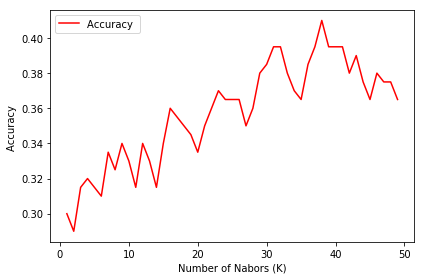

In [21]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.legend(('Accuracy ', ''))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [22]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38


<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>

In [ ]:
head(y_hat)